In [1]:
import pandas as pd
import json

In [2]:
%matplotlib inline

# Load data from json

In [3]:
DATA_PATH = 'data/lesetagebuch-florian.json'
df = pd.read_json(DATA_PATH)
df

,entries,name,url,username
0,"{'tags': ['german', 'fiction'], 'id': 38445, '...",Florian,/von/florian,florian
1,"{'tags': ['english'], 'id': 38441, 'book_type'...",Florian,/von/florian,florian
2,"{'tags': ['finance', 'german'], 'id': 38406, '...",Florian,/von/florian,florian
3,"{'tags': ['english', 'fiction'], 'id': 38405, ...",Florian,/von/florian,florian
4,"{'tags': ['english', 'finance'], 'id': 38338, ...",Florian,/von/florian,florian
...,...,...,...,...
147,"{'tags': [], 'id': 1457, 'book_type': 'book', ...",Florian,/von/florian,florian
148,"{'tags': [], 'id': 1019, 'book_type': 'book', ...",Florian,/von/florian,florian
149,"{'tags': [], 'id': 1004, 'book_type': 'book', ...",Florian,/von/florian,florian
150,"{'tags': [], 'id': 992, 'book_type': 'book', '...",Florian,/von/florian,florian


In [4]:
with open(DATA_PATH) as fp:
    books = json.load(fp)


# Set up dataframe with desired structure and types

In [5]:
books['entries'][0]

{'book': {'author': {'id': 4662,
   'name': 'J.L. Carr',
   'url': '/autor/j-l-carr'},
  'id': 9538,
  'pages': 144,
  'title': 'Ein Monat auf dem Land',
  'url': '/buch/ein-monat-auf-dem-land'},
 'book_type': 'book',
 'comment': 'Eine kurze Geschichte. Schön geschrieben und angenehm wehmütig. Nicht aktiv traurig, eher nachdenklich. Ich mochte es sehr.',
 'date': '2020-10-18',
 'id': 38445,
 'pinned': False,
 'private': False,
 'rating': 4,
 'tags': ['german', 'fiction'],
 'type': 'finished',
 'url': '/eintrag/38445',
 'user': {'username': 'florian'}}

In [31]:
def _language(tags):
    for lang in ('German', 'English'):
        if lang.lower() in tags:
            return lang
    return 'Unknown'

drop_keys = ['book', 'user']
books_flat = [
    {
        **{k:v for k, v in book.items() if k not in drop_keys},
        **{
            'author': book['book']['author']['name'],
            'title': book['book']['title'],
            'book_pages': book['book']['pages'],
            'username': book['user']['username'],
            'language': _language(book.get('tags'))
         }
    }
    for book in books['entries']
]

df = pd.DataFrame(books_flat)
df['date'] = df.date.str.replace('00', '01')  # fallback dates were day not specified
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,author,book_pages,book_type,comment,date,id,language,pinned,private,rating,tags,title,type,url,username
0,J.L. Carr,144,book,Eine kurze Geschichte. Schön geschrieben und a...,2020-10-18,38445,German,False,False,4.0,"[german, fiction]",Ein Monat auf dem Land,finished,/eintrag/38445,florian
1,James Clear,320,book,James Clear describes how habits work in your ...,2020-10-17,38441,English,False,False,4.0,[english],Atomic Habits,finished,/eintrag/38441,florian
2,André Kostolany,240,audio_book,Ein Hauch vergangener Zeiten. Angenehmes Hörbu...,2020-06-30,38406,German,False,False,4.0,"[finance, german]","Die Kunst, über Geld nachzudenken",finished,/eintrag/38406,florian
3,Robert Harris,320,audio_book,I just finished the Von Braun biography 2 week...,2020-10-12,38405,English,False,False,4.0,"[english, fiction]",V2,finished,/eintrag/38405,florian
4,Morgan Housel,256,book,I don't know how exactly to categorize this bo...,2020-10-06,38338,English,False,False,5.0,"[english, finance]",The Psychology of Money,finished,/eintrag/38338,florian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Sam Williams,264,book,Some kind of biography about Richard Stallman ...,2013-02-12,1457,Unknown,False,False,4.0,[],Free as in Freedom,finished,/eintrag/1457,florian
148,Malcolm Gladwell,304,book,"Interessant zu erfahren, dass manchmal eine sp...",2013-01-23,1019,Unknown,False,False,3.0,[],Blink!,finished,/eintrag/1019,florian
149,Volker Kutscher,560,book,Tolle Atmosphäre im Berlin der 1920er Jahre. S...,2013-01-07,1004,Unknown,False,False,4.0,[],Der nasse Fisch,finished,/eintrag/1004,florian
150,Joseph Campbell,418,book,None,2015-01-19,992,Unknown,False,False,NaN,[],The Hero with a Thousand Faces,wished,/eintrag/992,florian


In [7]:
df.dtypes

author                object
book_pages             int64
book_type             object
comment               object
date          datetime64[ns]
id                     int64
pinned                  bool
private                 bool
rating               float64
tags                  object
title                 object
type                  object
url                   object
username              object
dtype: object

#  Mostly paper books, few audio books

In [8]:
# df.book_type.value_counts().plot(kind='pie', leg)

# How many books per year

In [9]:
yearly_stats = (
    df.assign(
        year=lambda entry: entry['date'].dt.year
    )
    .groupby('year')['title', 'book_pages']
).agg({
    'title': 'count',
    'book_pages': 'sum'
})
yearly_stats

,title,book_pages
year,,
2013,24,6237
2014,13,4688
2015,10,3745
2016,16,6320
2017,23,8161
2018,20,6458
2019,29,9727
2020,17,6939


## How many _books_ have I read each year?

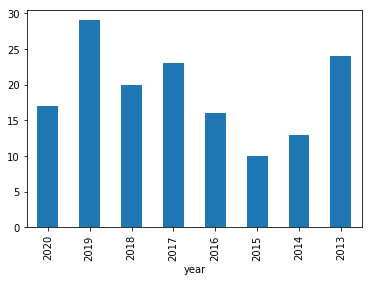

In [10]:
yearly_stats['title'].sort_index(ascending=False).plot(kind='bar')

## How many _pages_ have I read each year?

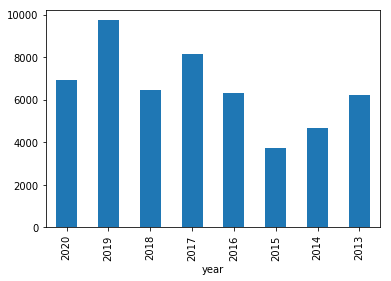

In [11]:
yearly_stats['book_pages'].sort_index(ascending=False).plot(kind='bar')

# What's the month where I read the most?

In [12]:
years = df.assign(
    year=lambda entry: entry['date'].dt.year
)['year']
num_years = len(years.unique())
num_years

8

In [13]:
monthly_stats = (
    df.assign(
        year=lambda entry: entry['date'].dt.month
    )
    .groupby('year')['title', 'book_pages']
).agg({
    'title': 'count',  # FIXME: I need the mean of the count instead!
    'book_pages': 'mean'
}).rename(
    columns={
        'title': 'books_num_total',
        'book_pages': 'pages_per_month'
    }
).assign(
    books_per_month=lambda entry: (entry['books_num_total'] / num_years)
)[
    ['pages_per_month', 'books_per_month']
]
monthly_stats

,pages_per_month,books_per_month
year,,
1,299.823529,2.125
2,382.941176,2.125
3,394.500000,0.750
4,419.444444,1.125
5,423.000000,1.000
6,426.800000,0.625
7,315.777778,1.125
8,331.181818,1.375
9,406.812500,2.000


## December is when I read most books
...to hit the reading goal?

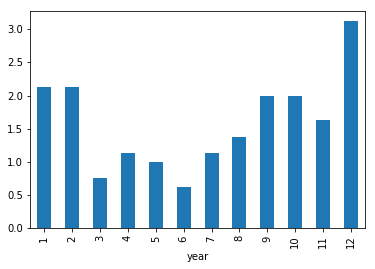

In [14]:
monthly_stats['books_per_month'].sort_index().plot(kind='bar')

## However, books read in December are shorter on average
Is it easier to hit the reading goal that way?

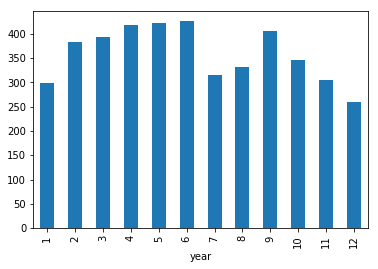

In [15]:
monthly_stats['pages_per_month'].sort_index().plot(kind='bar')

In [16]:
# Do I like the books I read?

# Ratings

/Users/flo/miniconda3/envs/learn-ml/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


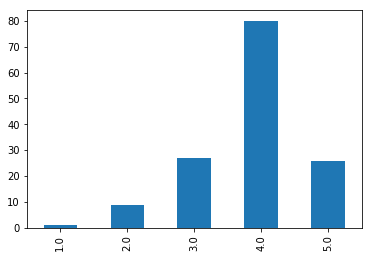

In [17]:
df_rated = (
    df
    [df.rating.notnull()]
    [df.rating>0]
)
df_rated.rating.value_counts().sort_index().plot(kind='bar')

In [18]:
# Odd: some non-rated books have rating None, some have rating 0.0
print(len(df[df.rating.isna()]))
print(len(df[df.rating.isnull()]))
print(len(df[df.rating==0.0]))
df[df.rating==0.0]

3
3
6


,author,book_pages,book_type,comment,date,id,pinned,private,rating,tags,title,type,url,username
11,Steven S. Skiena,445,book,"Read this as part of our ""Data Science Study G...",2020-07-13,37486,False,False,0.0,"[english, science, tech]",The Data Science Design Manual,finished,/eintrag/37486,florian
55,Ben Aaronovitch,395,book,"After a couple of non-fiction books, I wanted ...",2018-11-24,29202,False,False,0.0,"[english, novel]",Rivers Of London,finished,/eintrag/29202,florian
62,Wolfram Wette,288,book,"Karl Jäger, von seinen Nachbarn als feinsinnig...",2018-02-19,22414,False,False,0.0,"[german, biography, history, ww2]",Karl Jäger,finished,/eintrag/22414,florian
63,Hannah Arendt,448,book,"Es gibt so viel aus der deutschen Geschichte, ...",2018-02-11,22299,False,False,0.0,"[german, history, philosophy, ww2, biography]",Eichmann in Jerusalem: Ein Bericht von der Ban...,finished,/eintrag/22299,florian
64,Ernst Klee,191,book,"Spannende Rechercheergebnisse, wie die deutsch...",2018-01-25,22298,False,False,0.0,"[german, history, ww2]",Persilscheine und falsche Pässe,finished,/eintrag/22298,florian
92,Jeffrey Eugenides,596,book,None,2016-11-09,15190,False,False,0.0,[],Middlesex,wished,/eintrag/15190,florian


## Distribution of book lengths

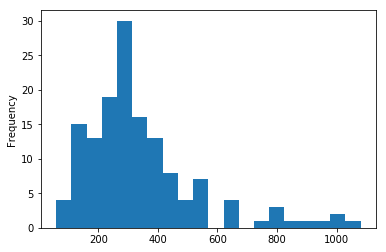

In [19]:
df_rated.book_pages.plot.hist(bins=20)

## Do I rate longer books higher?

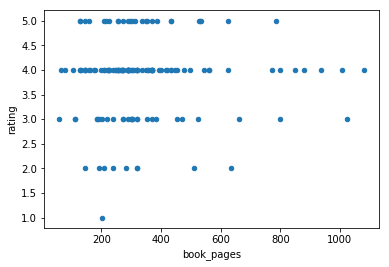

In [20]:
df_rated.plot.scatter(x='book_pages', y='rating')

# Split books in short / medium / long

In [21]:
# auto split is not to my taste. "long" should start later
pd.qcut(df.book_pages, 3).value_counts()

(58.999, 256.0]    54
(363.0, 1080.0]    51
(256.0, 363.0]     47
Name: book_pages, dtype: int64

In [22]:
# I want to call the middle 50% "Medium" and distribute the other lengths equally to the sides
pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.]).value_counts()

(221.75, 404.0]     76
(404.0, 1080.0]     38
(58.999, 221.75]    38
Name: book_pages, dtype: int64

In [23]:
# Now actually assign some names
book_length = pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.], labels=['Short', 'Medium', 'Long'])
book_length.value_counts()

Medium    76
Long      38
Short     38
Name: book_pages, dtype: int64

# How do ratings vary by book length and paper vs. audio book (pivot table!)

In [24]:
rating_per_length_and_type = df.assign(
    book_length=book_length
).pivot_table(
    values='rating',
    index='book_length',
    columns='book_type'
)
rating_per_length_and_type

book_type,audio_book,book
book_length,,
Short,NaN,3.594595
Medium,4.25,3.760563
Long,4.00,3.571429


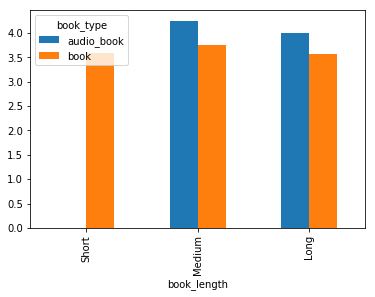

In [25]:
rating_per_length_and_type.plot.bar()

In [26]:
pages_per_rating = df_rated[
    ['rating', 'book_pages']
].groupby('rating').agg(['mean', 'std']).fillna(0)
pages_per_rating

book_pages            
              mean         std
rating                        
1.0     202.000000    0.000000
2.0     317.555556  159.232622
3.0     341.740741  211.662757
4.0     349.175000  208.061747
5.0     340.115385  160.006082

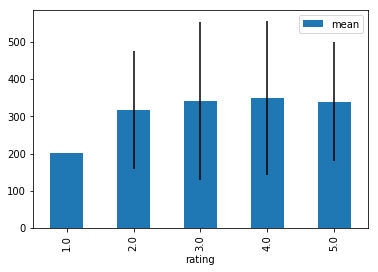

In [27]:
pages_per_rating.book_pages.plot.bar(y='mean', yerr='std')

# Do I write longer comments for longer books?

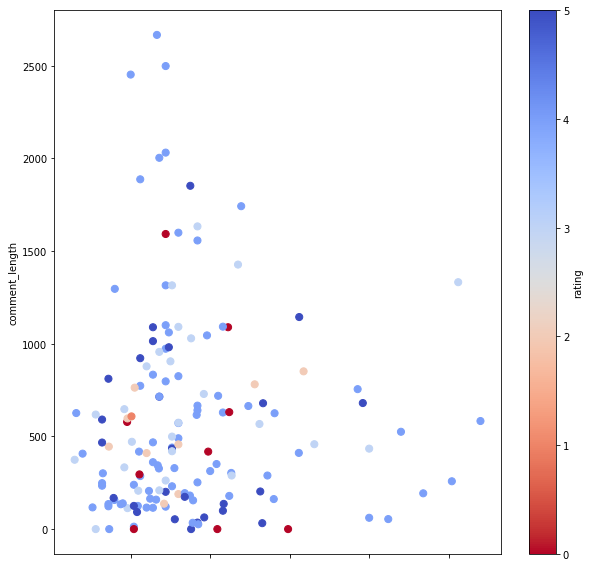

In [28]:
df.assign(
    comment_length=lambda entry: entry.comment.str.len()
).fillna(0).plot.scatter(
    x='book_pages',
    y='comment_length',
    c='rating',
    colormap='coolwarm_r',
    figsize=(10,10),
    s=50  # marker size
)

# Compare language and genre preferences over time
Currently not all books are tagged

In [44]:
table_1 = pd.pivot_table(
    df.assign(
        year=lambda entry: entry['date'].dt.year
    ),
    index='year',
    columns='language',
    
    # count number of books (=number of titles)
    values='title',
    aggfunc='count',
    
    # prepare so that we can calculate percentages in next step
    fill_value=0,
    margins=True
)
table_1

language,English,German,Unknown,All
year,,,,
2013,0,0,24,24
2014,0,0,13,13
2015,0,0,10,10
2016,0,0,16,16
2017,0,0,23,23
2018,9,11,0,20
2019,18,11,0,29
2020,12,3,2,17
All,39,25,88,152


In [47]:
# Display percentages
table_2 = table_1.div(table_1.All, axis=0)
table_2

language,English,German,Unknown,All
year,,,,
2013,0.000000,0.000000,1.000000,1.0
2014,0.000000,0.000000,1.000000,1.0
2015,0.000000,0.000000,1.000000,1.0
2016,0.000000,0.000000,1.000000,1.0
2017,0.000000,0.000000,1.000000,1.0
2018,0.450000,0.550000,0.000000,1.0
2019,0.620690,0.379310,0.000000,1.0
2020,0.705882,0.176471,0.117647,1.0
All,0.256579,0.164474,0.578947,1.0


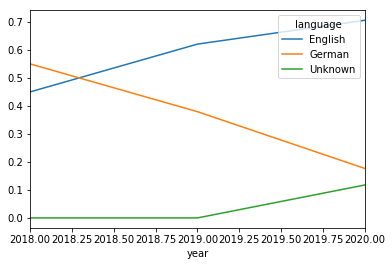

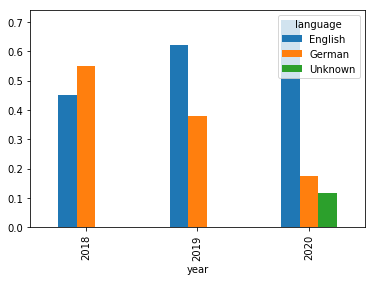

In [70]:
tagged_years = table_2.loc[
    [2018, 2019, 2020]
][
    ['English', 'German', 'Unknown']  # hide 'All'
]
tagged_years.plot.line()
tagged_years.plot.bar()

In [38]:
pd.pivot_table?

Signature: pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table colu